# Supervised ANNs for Mutual Information Investigation
## Thomas Possidente

### Imports and Initializations

In [425]:
# ANN Building and Visualization Imports
import keras
from keras import backend as K
from keras import optimizers, losses
from keras.engine.topology import Layer
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import tensorflow as tf
from keras.callbacks import LambdaCallback
from keras.utils import to_categorical
import matplotlib.pyplot as plt



# Standard Imports
import pandas as pd
import numpy as np
import math

# Value Inits - Specify as needed
num_inputs = int(5000)  # number of dummy images in set
size = int(16)          # Dimension of each dummy image should be size*size
RF_size = int(2)        # Dimensions of the RF to be analyzed should be RF_size*RF_size
noise = 0.1             # percentage (as decimal) of input values that will be flipped 

# Value Inits - Leave these alone
num_of_RFs = int((size*size) / (RF_size*RF_size))


### Reading in Data

In [426]:
inputs = pd.read_csv('test.csv')
inputs = inputs.drop('X1', axis = 0) # Taking out col names
inputs = inputs.apply(pd.to_numeric)  # converting to floats

inputs = inputs.values # convert to np ndarray
inputs = inputs.reshape(num_inputs, size, size,1) # reshape to desired dims (5000 examples, 16*16 image, 1 channel)
flattened_inputs = inputs.reshape(num_inputs, size*size)

### Creating Labels

In [428]:
labels = np.zeros(np.shape(flattened_inputs)[0])
storage = np.zeros(np.shape(flattened_inputs))
count = 0

for i in range(np.shape(flattened_inputs)[0]):
    if(~((flattened_inputs[i] == storage).all(1).any())):
        labels[i] = count
        storage[i] = flattened_inputs[i]
        count += 1
    elif((flattened_inputs[i] == storage).all(1).any()):
        label_index = np.where((flattened_inputs[i] == storage).all(1))
        correct_label = labels[label_index]
        storage[i] = flattened_inputs[i]
        labels[i] = correct_label[0]
        
labels = labels.astype(int)
labels = to_categorical(labels)

    

In [429]:
labels.shape

(5120, 256)

### Cutting Number of Labels Possible to 256 if Necessary

In [427]:
inputs = inputs[0:256]
inputs = np.repeat(inputs, 20, axis=0)
inputs = np.random.permutation(inputs)
flattened_inputs = flattened_inputs[0:256]
flattened_inputs = np.repeat(flattened_inputs, 20, 0)
flattened_inputs = np.random.permutation(flattened_inputs)

num_inputs = flattened_inputs.shape[0]


### Adding Noise to Inputs

In [431]:
for n in range(np.shape(flattened_inputs)[0]):
    indices_to_flip = np.random.choice(int(size*size), math.ceil(size*size * noise), replace = False)
    flattened_inputs[n][indices_to_flip] = 1 - flattened_inputs[n][indices_to_flip]

inputs = flattened_inputs.reshape(num_inputs, size, size, 1)


### Building Network

In [434]:
model = Sequential()
model.add(Conv2D(input_shape = (16,16,1), filters=4, kernel_size = RF_size, strides = RF_size, activation = 'relu'))
model.add(Flatten())
model.add(Dense(256, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 8, 8, 4)           20        
_________________________________________________________________
flatten_56 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 256)               65792     
Total params: 65,812
Trainable params: 65,812
Non-trainable params: 0
_________________________________________________________________


In [435]:
model.compile(optimizer = optimizers.adam(lr = 0.0005), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [436]:
history = model.fit(x = inputs, validation_split = 0.25, y = labels, batch_size = 100, epochs = 100, shuffle=False)

Train on 3840 samples, validate on 1280 samples
Epoch 1/100
3840/3840 [==============================] - 3s 842us/step - loss: 5.4801 - acc: 0.0146 - val_loss: 5.2839 - val_acc: 0.0516
Epoch 2/100
3840/3840 [==============================] - 1s 215us/step - loss: 5.0188 - acc: 0.1680 - val_loss: 4.8240 - val_acc: 0.3070
Epoch 3/100
3840/3840 [==============================] - 1s 206us/step - loss: 4.4371 - acc: 0.6372 - val_loss: 4.2128 - val_acc: 0.7672
Epoch 4/100
3840/3840 [==============================] - 1s 215us/step - loss: 3.7207 - acc: 0.9344 - val_loss: 3.4796 - val_acc: 0.9633
Epoch 5/100
3840/3840 [==============================] - 1s 218us/step - loss: 2.8807 - acc: 0.9953 - val_loss: 2.6170 - val_acc: 1.0000
Epoch 6/100
3840/3840 [==============================] - 1s 210us/step - loss: 1.9626 - acc: 0.9997 - val_loss: 1.7201 - val_acc: 1.0000
Epoch 7/100
3840/3840 [==============================] - 1s 214us/step - loss: 1.1429 - acc: 1.0000 - val_loss: 0.9897 - val_acc: 

3840/3840 [==============================] - 1s 206us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000
Epoch 61/100
3840/3840 [==============================] - 1s 210us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 62/100
3840/3840 [==============================] - 1s 206us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 63/100
3840/3840 [==============================] - 1s 219us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 64/100
3840/3840 [==============================] - 1s 202us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 65/100
3840/3840 [==============================] - 1s 208us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 66/100
3840/3840 [==============================] - 1s 212us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 67/100
3840/3840 [=======================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


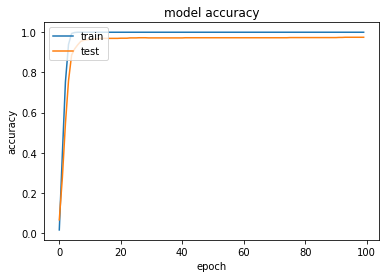

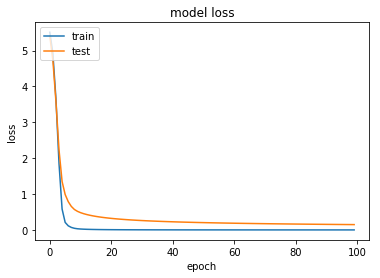

In [139]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### TODOS
* Run again with 2x2, 3x3, 4x4, 5x5, 6x6, 7x7, 8x8 and 10%, 20%, 30%, 40%, 50% noise. Save outputs and Loss curve
* Controls - Work on creating image sets of specific submatrix pattern size (3*3) that have varying levels of MI
* Find Image dataset that's binarized (or binarize existing one) and do MI calculations to find max MI. To do this, sample RF sized chunks of an image until stable average MI value is reached
* https://people.cs.umass.edu/~marlin/data.shtml, http://vision.lems.brown.edu/content/available-software-and-databases